In [ ]:
!pip install dabl

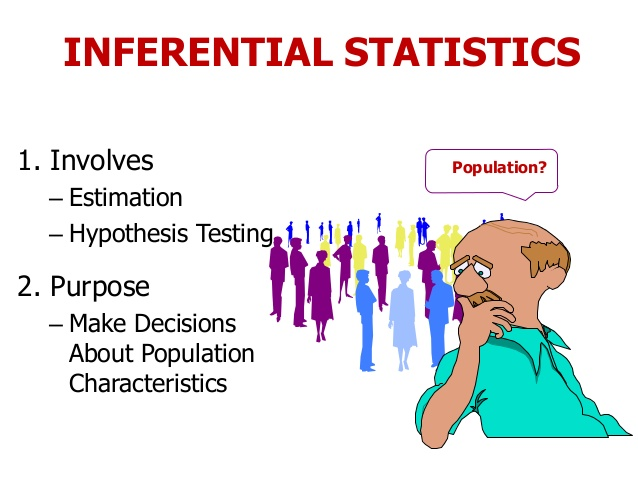

# Introduction to Inferential Statistics

* Sample Mean & Population Mean
* Statistical Inference
* Central Limit Theorem
* Confidence Intervals
* Interpretation Of Confidence Interval

In [1]:
# for basic operations
import numpy as np 
import pandas as pd 

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Inferential Statistics on House Price Analysis

In [4]:
# reading the data
data = pd.read_csv('house_prices_train.csv')

# lets check the shape of the dataset
data.shape

(1460, 81)

* **Let's check out the Probability of picking a house in the Neighborhood - "OldTown"**


No. of houses in OldTown/Total no. of houses
Let's go through this in Python

In [6]:
# let's check the columns in the dataset
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# lets check the different neighborhoods
data['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [8]:
# total number of houses in the neighborhood
all_houses = data.shape[0]
print("Total Number of Houses in the Neighborhood :", all_houses)

Total Number of Houses in the Neighborhood : 1460


In [9]:
# total number of houses in the Old town neighborhood
houses_in_OldTown = data[data['Neighborhood'] == 'OldTown'].shape[0]
print("Total Number of Houses in the Old Town Road :", houses_in_OldTown)


Total Number of Houses in the Old Town Road : 113


In [10]:
# lets find the probability of picking a House in the Old Town
probability = (houses_in_OldTown/all_houses)*100
print('Probability of picking a house in OldTown: {0:.2f}'.format(probability )+'%')

Probability of picking a house in OldTown: 7.74%


## Normal Distrution

* Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. In graph form, normal distribution will appear as a bell curve.

### Checking for Skewness of the data

* We Generally check Askewness in the Target Columns of the data.
* Skewness is a state of distribution where the distribution is highly biased towards the right or left side of the plot.

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


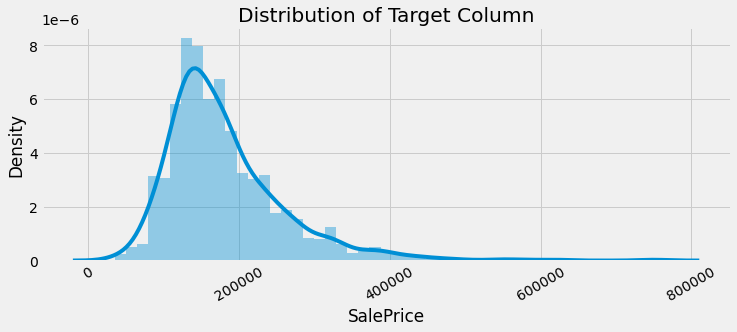

In [11]:
plt.rcParams['figure.figsize'] = (11, 4)
plt.style.use('fivethirtyeight')

plt.xticks(rotation=30)
sns.distplot(data['SalePrice'])
plt.title('Distribution of Target Column')
plt.show()

* The distribution for our target variable aka SalePrice doesn't resemble a normal distribution, it is skewed to the right
* If we remove the outliers, it'd somewhat resemble a Normal Dstribution

## Inference

### Sample Mean and population Mean

* Let's consider a sample of 500 houses at random from 1460 houses and plot it's mean
* But the mean of these 500 houses can be near or pretty far away from the mean of the 1460 houses calculated earlier.

In [12]:
# lets take seed so that everytime the random values come out to be constant
np.random.seed(6)

# lets take 500 sample values from the dataset of 1460 values
sample_ages = np.random.choice(a= data['SalePrice'], size=500)

# getting the sample mean
print ("Sample mean:", sample_ages.mean() )          

# getting the population mean
print("Population mean:", data['SalePrice'].mean())

Sample mean: 177499.802
Population mean: 180921.19589041095


## Statistical Inference

* This **subset** of the population is nothing but the Sample data

* We carry out various tests on the Sample to gain insight on the larger population out there!

* Therefore Statistical inference is the process of analyzing sample data to gain insight into the population from which the data was collected and to investigate differences between different data samples.

The sample mean is usually not exactly the same as the population mean. This difference can be caused by many factors including poor survey design, biased sampling methods and the randomness inherent to drawing a sample from a population.



## Confidence Interval

**Confidence Interval (CI)** is a type of estimate computed from the statistics of the observed data. This proposes a range of plausible values for an unknown parameter (for example, the mean). The interval has an associated confidence level that the true parameter is in the proposed range.

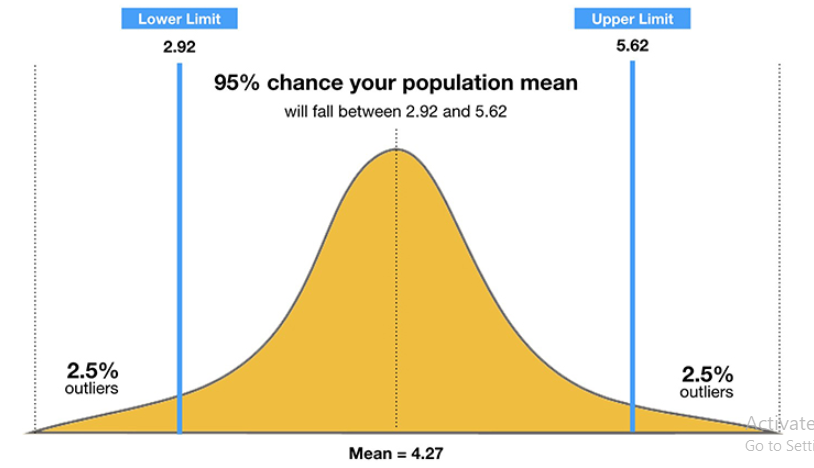

The 95% confidence interval defines a range of values that you can be 95% certain contains the population mean. With large samples, you know that mean with much more precision than you do with a small sample, so the confidence interval is quite narrow when computed from a large sample.

In [14]:
# lets import the scipy package
import scipy.stats as stats
import math

# lets seed the random values
np.random.seed(10)

# lets take a sample size
sample_size = 1000
sample = np.random.choice(a= data['SalePrice'],
                          size = sample_size)
sample_mean = sample.mean()

# Get the z-critical value*
z_critical = stats.norm.ppf(q = 0.95)  

 # Check the z-critical value  
print("z-critical value: ",z_critical)                                

# Get the population standard deviation
pop_stdev = data['SalePrice'].std()  

# checking the margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

# defining our confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

# lets print the results
print("Confidence interval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(data['SalePrice'].mean()))

z-critical value:  1.6448536269514722
Confidence interval: (178338.05201966673, 186602.42998033328)
True mean: 180921.19589041095


* Notice that the true mean is contained in our interval.
* A confidence interval of 95% would mean that if we take many samples and create confidence intervals for each of them, 95% of our samples' confidence intervals will contain the true population mean.
* Now, let's create several confidence intervals and plot them to get a better sense of what it means to "capture" the true mean

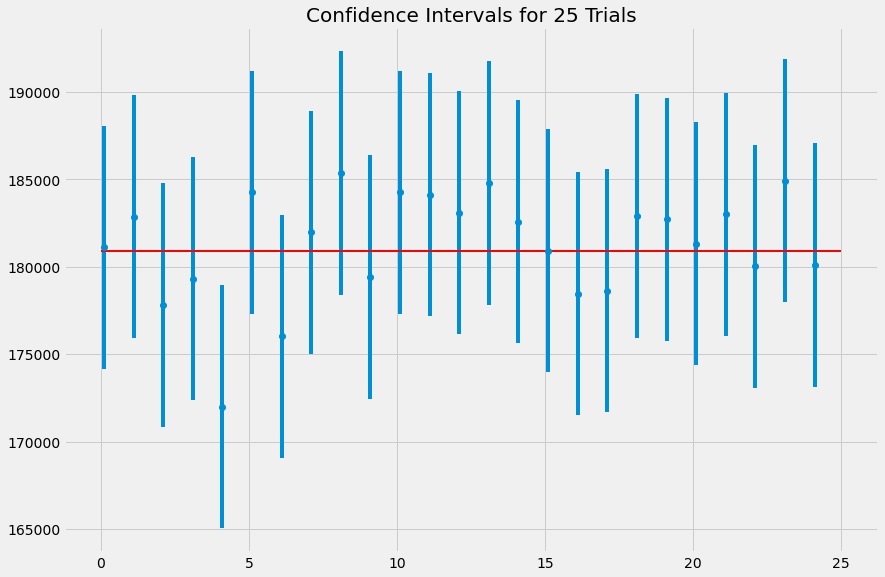

In [15]:
np.random.seed(12)

sample_size = 500

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= data['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

     # Get the z-critical value* 
    z_critical = stats.norm.ppf(q = 0.975)         

    # Get the population standard deviation
    pop_stdev = data['SalePrice'].std()  

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
    

plt.figure(figsize=(13, 9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=data['SalePrice'].mean(), 
           linewidth=2.0,
           color="red")
plt.title('Confidence Intervals for 25 Trials', fontsize = 20)
plt.show()

* It is easily visible that 95% of the times the blue lines(the sample meean) overlaps with the red line(the true mean), also 5% of the times it is expected to not overlap with the red line(the true mean).

In [16]:
#-------------------------------------------------------------------------------------------

# Inferential Statistics on Heart Attack Analysis

In [31]:
df = pd.read_csv('heart_dataset.csv')
df.head()

,Patient ID,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


1.**What proportion of the population has a higher chance of having a heart attack?**

The answer to this question about the entire population has to be given from our data that is a random sample of our population.
* **OUR TASK**:Obtain a 95% confidence interval for the population proportion of people that have higher chances of heart attack.
* What we mean by 95% confidence interval is that “we are confident that in 95% of the samplings, the samples will have the **proportion of people having higher chances of heart attack** that can create the interval which covers the **population proportion of people that have higher chances of heart attack**”

In [33]:
df['Heart Attack Risk'].replace({0:'Less chance',1:'More chance'},inplace=True)

print(df['Heart Attack Risk'].value_counts())
n = df.shape[0]
More_chance = df['Heart Attack Risk'].value_counts().loc['More chance']

print("\nTotal Observation ==>",n,"\t","Number of people in our population data having more chances of heart attack==> ",More_chance,"\n")

Less chance    5624
More chance    3139
Name: Heart Attack Risk, dtype: int64

Total Observation ==> 8763 	 Number of people in our sample data having more chances of heart attack==>  3139 



In [54]:
sample_size = 1000
sample_heart = np.random.choice(a= df['Heart Attack Risk'],
                          size = sample_size)


n_sample = sample_heart.shape[0]
More_chance_sample = (sample_heart=='More chance').sum()

print("\nTotal Observation ==>",n_sample,"\t","Number of people in our sample data having more chances of heart attack==> ",More_chance_sample,"\n")


Total Observation ==> 1000 	 Number of people in our sample data having more chances of heart attack==>  355 



In [55]:
import statsmodels.api as sm
print("\n95% Confidence interval with statsmodels library ==>",sm.stats.proportion_confint(More_chance_sample, n_sample),"\n")


95% Confidence interval with statsmodels library ==> (0.3253419819699893, 0.38465801803001065) 



**Interpretation of the result**:
* With 95% confidence, the population proportion of people having more chances of heart attack is estimated to be between 32.5% - 38.46%.


**2.What is the average cholesterol level for people with more chance of heart attack?**
*  This question has to be answered for the population,so we need to obtain a confidence interval as in the previous question.What is different is the population metric,it was proportion in the previous question and it is mean in this question.The population is also different as now it just contains the people with more chance of heart attack.
* The population:people having more chance of heart attack
* The population metric:average cholesterol level of people having more chance of heart attack

* Our task:To obtain a 95% confidence interval around the **sample average cholesterol level** that will contain the **population average cholesterol level** in 95% of the samplings.

In [64]:
df_more_chance=df[df['Heart Attack Risk']=='More chance']
print("\n95% C.I. with statsmodels library ==>",sm.stats.DescrStatsW(df_more_chance['Cholesterol']).zconfint_mean())


95% C.I. with statsmodels library ==> (259.1431751703988, 264.79757028993885)


In [65]:
df_more_chance=df[df['Heart Attack Risk']=='More chance']

sample_df_more_chance=np.random.choice(a= df['Cholesterol'],
                          size = sample_size)

print("\n95% C.I. with statsmodels library ==>",sm.stats.DescrStatsW(sample_df_more_chance).zconfint_mean())


95% C.I. with statsmodels library ==> (251.2699409457592, 261.3600590542408)


**Interpretation of the result**:
* With 95% confidence, the population average cholestrol level of people having more chances of heart attack is estimated to be between 251.26 and 261.36

### How to use Python to Figure out Sample Sizes for your Study
It's common wisdom among data scientists that 80% of your time is spent cleaning data, while 20% is the actual analysis.


One important up front activity in empirical research is figuring out the sample size you need. This is a crucial, since it significantly impacts the cost of your study and the reliability of your results. Collect too much sample: you’ve wasted money and time. Collect too little: your results may be useless.

#### Understanding the sample size you need depends on the statistical test you plan to use.

If it’s a straightforward test, then finding the desired sample size can be just a matter of plugging numbers into an equation. However, it can be more involved, in which case a programming language like Python can make life easier. In this post, I’ll go through one of these more difficult cases.
## Let's see an example:

you are doing a study on a marketing effort that’s intended to increase the proportion of women entering your store (say, a change in signage). Suppose you want to know whether the change actually increased the proportion of women walking through. You’re planning on collecting the data before and after you change the signs and determine if there’s a difference. You’ll be using a two-proportion Z test for comparing the two proportions. You’re unsure how long you’ll need to collect the data to get reliable results — you first have to figure out how much sample you need!
### First

you will need to determine the required sample size which will be done by understanding the statical test that you'll be using. The two sample Z test for proportions determines whether a population proportion p1 is equal to another population proportion p2. In our example, p1 and p2 are the proportion of women entering the store before and after the marketing change(respectively), and we want to see whether there was a statistically significant increase in P2 over p1, i.e. p2 > p1.

### The test tests the null hypothesis: p1 - p2 =0. the Test statistic we use to test this null hypothese is:
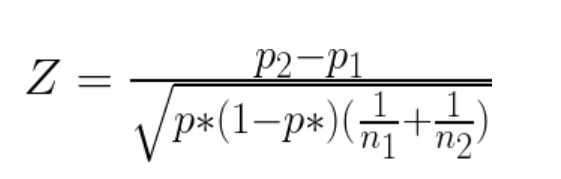
Where p* is the proportion of “successes” (i.e. women entering the store) in the two samples combined. I.e.

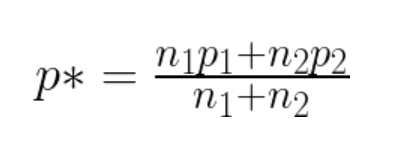
### So how to figure out the sample size we need? It depends on a few factors:

1. The confidence level
2. The percentage difference that we want to be able to detect
3. The absolute values of the probabilities you want to detect differences on
4. The distribution of the data results

## Figuring out Possibilities for Sample Sizes with Python
Ultimately, we want to make sure we’re able to calculate a difference between p1 and p2 when it exists. So, let’s assume you know that the “true” difference that exists between p1 and p2. Then, we can look at sample size requirements for various confidence levels and absolute levels of p1.



We need a way of figuring out Z, so we can determine whether a given sample size provides statistically significant results, so let’s define a function that returns the Z value given p1, p2, n1, and n2.



In [66]:
def z_calc(p1, p2, n1, n2):
    p_star = (p1*n1 + p2*n2) / (n1 + n2)
    return (p2 - p1) / math.sqrt(p_star*(1 - p_star)*((1.0 / n1) + (1.0 / n2)))

Then, we can define a function that returns the sample required, given p1 (the before probability), p_diff (i.e. p2-p1), and alpha (which represents the p-value, or 1 minus the confidence level). For simplicity we’ll just assume that n1 = n2. If you know in advance that n1 will have about a quarter of the size of n2, then it’s trivial to incorporate this into the function. However, you typically don’t know this in advance and in our scenario an equal sample assumption seems reasonable.


In [67]:
def sample_required(p1, p_diff, alpha):
    if p_diff <= 0:
        raise ValueError("p_diff must be > 0")
    n = 1
    while True:
        z = z_calc(p1, p1+p_diff, n1=n, n2=n)
        p = 1 - stats.norm.cdf(z)
        if p < alpha:
            break
        n += 1
    return n

In [71]:
sample_size = sample_required(p1=0.95,p_diff=.05,alpha=.05)
sample_heart = np.random.choice(a= df['Heart Attack Risk'],
                          size = sample_size)


n_sample = sample_heart.shape[0]
More_chance_sample = (sample_heart=='More chance').sum()

print("\nTotal Observation ==>",n_sample,"\t","Number of people in our sample data having more chances of heart attack==> ",More_chance_sample,"\n")


Total Observation ==> 53 	 Number of people in our sample data having more chances of heart attack==>  15 



In [72]:
p1s = [x*.01 for x in range(96)]
p_diff =0
data = []
for p1 in p1s:
    sample_size = sample_required(p1=p1,p_diff=.05,alpha=.05)
    sample_heart = np.random.choice(a= df['Heart Attack Risk'],
                              size = sample_size)


    n_sample = sample_heart.shape[0]
    More_chance_sample = (sample_heart=='More chance').sum()

    print("\nTotal Observation ==>",n_sample,"\t","Number of people in our sample data having more chances of heart attack==> ",More_chance_sample,"\n")



Total Observation ==> 53 	 Number of people in our sample data having more chances of heart attack==>  18 


Total Observation ==> 74 	 Number of people in our sample data having more chances of heart attack==>  26 


Total Observation ==> 94 	 Number of people in our sample data having more chances of heart attack==>  30 


Total Observation ==> 113 	 Number of people in our sample data having more chances of heart attack==>  43 


Total Observation ==> 132 	 Number of people in our sample data having more chances of heart attack==>  42 


Total Observation ==> 151 	 Number of people in our sample data having more chances of heart attack==>  60 


Total Observation ==> 169 	 Number of people in our sample data having more chances of heart attack==>  57 


Total Observation ==> 187 	 Number of people in our sample data having more chances of heart attack==>  64 


Total Observation ==> 204 	 Number of people in our sample data having more chances of heart attack==>  79 


Total Observ


Total Observation ==> 327 	 Number of people in our sample data having more chances of heart attack==>  126 


Total Observation ==> 313 	 Number of people in our sample data having more chances of heart attack==>  125 


Total Observation ==> 299 	 Number of people in our sample data having more chances of heart attack==>  112 


Total Observation ==> 284 	 Number of people in our sample data having more chances of heart attack==>  106 


Total Observation ==> 269 	 Number of people in our sample data having more chances of heart attack==>  88 


Total Observation ==> 253 	 Number of people in our sample data having more chances of heart attack==>  87 


Total Observation ==> 237 	 Number of people in our sample data having more chances of heart attack==>  87 


Total Observation ==> 221 	 Number of people in our sample data having more chances of heart attack==>  69 


Total Observation ==> 204 	 Number of people in our sample data having more chances of heart attack==>  75 


Total